In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# importing plotly for interactive plots
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px

In [3]:
day_wise_global = pd.read_csv('day_wise.csv')
day_wise_global['Date'] = pd.to_datetime(day_wise_global['Date'])

In [4]:
# storing the last row,which will be the total cases globally, in temp df   
overall_global_temp = day_wise_global[['Date', 'Deaths', 'Recovered', 'Active']].tail(1)
# changing the index to Date
overall_global_temp = overall_global_temp.melt(id_vars='Date', value_vars=['Active', 'Deaths', 'Recovered'])

In [5]:
# now plotting a tree map
fig = px.treemap(overall_global_temp, path=['variable'], values='value', height=225, color_discrete_sequence=['#21bf73', '#fe9801', '#ff2e46'])
#adding the data to be displayed
fig.data[0].textinfo='label+text+value'
fig.show()

In [6]:
# To create a heat map 
country_wise = pd.read_csv('country_wise.csv')
country_wise = country_wise.replace('', np.nan).fillna(0)

In [7]:
# making a function to create a heatmap for confirmed,recoveries and deaths
def plot_heat(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations='Country/Region', locationmode='country names', color=col, hover_name='Country/Region', title=col, hover_data=[col], color_continuous_scale=pal)
    fig.show()

In [8]:
# heat map for confirmed cases
plot_heat(country_wise, 'Confirmed', 'matter')

In [9]:
# heat map for deaths
plot_heat(country_wise, 'Deaths', 'matter')

In [10]:
# heat map for recovered cases
plot_heat(country_wise, 'Recovered', 'matter')

In [11]:
# making a function to to plot a bar chart 
def plot_barh(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n), x=col, y='Country/Region', orientation='h', width=800, color='WHO Region', text=col, hover_data=hover_data, color_discrete_sequence=px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title='', yaxis_title='', yaxis_categoryorder='total ascending', uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [12]:
# it will only plot for top 15 countries with highest no.of confirmed cases
plot_barh(country_wise, 'Confirmed', 15)

In [13]:
states_cases = pd.read_html("https://en.wikipedia.org/wiki/COVID-19_pandemic_in_India","Recoveries")[1]

In [14]:
states_cases.columns = ['States', 'Total Cases', 'Deaths', 'Recoveries', 'Active', ' a', 'b', 'c', 'd']

In [15]:
states_cases.drop([36,37], inplace=True)

In [16]:
states_cases.dropna(axis=1, inplace=True, how='all')

In [17]:
states_cases

,States,Total Cases,Deaths,Recoveries,Active
0,Andaman and Nicobar Islands,166,0,109,57
1,Andhra Pradesh,33019,408,17467,15144
2,Arunachal Pradesh,462,3,153,306
3,Assam,"17,807[b]",40,11416,6351
4,Bihar,19284,174,12849,6261
5,Chandigarh,600,10,446,144
6,Chhattisgarh,4379,20,3275,1084
7,Dadra and Nagar Haveli and Daman and Diu,520,1,310,209
8,Delhi,115346,3446,93236,18664
9,Goa,2753,18,1607,1128


In [18]:
states_cases['Total Cases'][3] = states_cases['Total Cases'][3].replace(',','')

In [19]:
states_cases['Total Cases'][3] = states_cases['Total Cases'][3].strip('[]b')
states_cases['Deaths'][16] = states_cases['Deaths'][16].strip('[]c')

In [20]:
states_cases

,States,Total Cases,Deaths,Recoveries,Active
0,Andaman and Nicobar Islands,166,0,109,57
1,Andhra Pradesh,33019,408,17467,15144
2,Arunachal Pradesh,462,3,153,306
3,Assam,17807,40,11416,6351
4,Bihar,19284,174,12849,6261
5,Chandigarh,600,10,446,144
6,Chhattisgarh,4379,20,3275,1084
7,Dadra and Nagar Haveli and Daman and Diu,520,1,310,209
8,Delhi,115346,3446,93236,18664
9,Goa,2753,18,1607,1128


In [21]:
states_cases['Total Cases'] = states_cases['Total Cases'].astype(int)
states_cases['Recoveries'] = states_cases['Recoveries'].astype(int)
states_cases['Deaths'] = states_cases['Deaths'].astype(int)
states_cases['Active'] = states_cases['Active'].astype(int)

In [22]:
#As the values are all strings, so we need to first convert them to integers
TotalCases = pd.Series(map(int,states_cases['Total Cases']))
Deaths = pd.Series(map(int,states_cases['Deaths']))
Recoveries = pd.Series(map(int,states_cases['Recoveries']))
Active = pd.Series(map(int,states_cases['Active']))

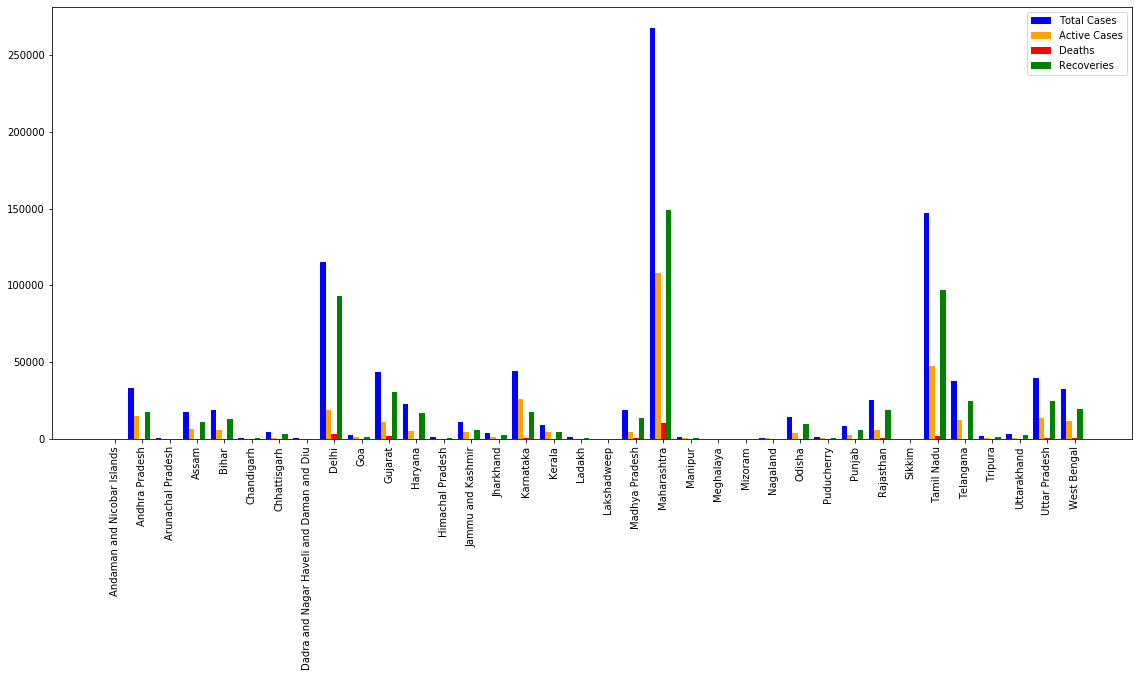

In [23]:
fig = plt.figure(figsize=[15,6])
axes = fig.add_axes([0,0,1,1])
x = np.arange(0, 36*4, step=4)
axes.bar(x, TotalCases, width=0.8, label="Total Cases", color="blue")
axes.bar(x+0.8, Active, width=0.8, label="Active Cases", color="orange")
axes.bar(x+1.6, Deaths, width=0.8, label="Deaths", color="red")
axes.bar(x+2.4, Recoveries, width=0.8, label="Recoveries", color="green")
plt.xticks(x+1.6, states_cases['States'], rotation=90) #to shift the labels on x axis as they are not at center of the bars
axes.legend() #to show the labels
plt.show()

In [24]:
total = pd.DataFrame(columns=['Total_Cases', 'Recoveries', 'Deaths'])
states_cases['Total Cases'] = states_cases['Total Cases'].astype(int)
states_cases['Recoveries'] = states_cases['Recoveries'].astype(int)
states_cases['Deaths'] = states_cases['Deaths'].astype(int)
Total_sum = states_cases['Total Cases'].sum()
Recoveries_sum = states_cases['Recoveries'].sum()
Deaths_sum = states_cases['Deaths'].sum()
total = total.append({'Total_Cases': Total_sum, 'Recoveries': Recoveries_sum, 'Deaths': Deaths_sum}, ignore_index=True)
total

,Total_Cases,Recoveries,Deaths
0,934657,592032,24309


In [25]:
fig = go.Figure()
totcase = total._get_value(0,'Total_Cases')
recovered = total._get_value(0,'Recoveries')
death = total._get_value(0, 'Deaths')
fig.add_trace(go.Pie(values=[totcase, recovered, death],
labels=['Total Cases', 'Total Recoveries', 'Total Deaths']))
fig.update_traces(marker=dict(colors=['#3498DB', '#2ECC71', '#E74C3C']))
fig.show()

In [26]:
data = go.Data([go.Bar(x=states_cases['States'], y=states_cases['Total Cases'], orientation='v')])
layout = go.Layout(title="Total Cases in States", width=1000)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

C:\Users\JAY\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [27]:
data = go.Data([go.Bar(x=states_cases['States'], y=states_cases['Recoveries'], orientation='v', marker={'color':'#32b432'})])
layout = go.Layout(title="Recoveries in States", width=1000)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [28]:
data = go.Data([go.Bar(x=states_cases['States'], y=states_cases['Deaths'], orientation='v', marker={'color':'#db3b3c'})])
layout = go.Layout(title="Deaths in States", width=1000)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [30]:
cases = pd.read_csv('indiacases_datasets.csv')

In [31]:
cases.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [32]:
cases.drop(['Latitude', 'Longitude', 'New cases', 'New deaths', 'New recovered'], axis=1, inplace=True)
cases.head()

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated
0,2020-01-30,Kerala,1,0,0
1,2020-01-31,Kerala,1,0,0
2,2020-02-01,Kerala,2,0,0
3,2020-02-02,Kerala,3,0,0
4,2020-02-03,Kerala,3,0,0


In [33]:
cases.columns = ['Date', 'State', 'Total_Cases', 'Deaths', 'Recoveries']
cases.head(50)

,Date,State,Total_Cases,Deaths,Recoveries
0,2020-01-30,Kerala,1,0,0
1,2020-01-31,Kerala,1,0,0
2,2020-02-01,Kerala,2,0,0
3,2020-02-02,Kerala,3,0,0
4,2020-02-03,Kerala,3,0,0
5,2020-02-04,Kerala,3,0,0
6,2020-02-05,Kerala,3,0,0
7,2020-02-06,Kerala,3,0,0
8,2020-02-07,Kerala,3,0,0
9,2020-02-08,Kerala,3,0,0


In [34]:
states=[]
def df_s(*args):
    for every_state in args:
        df = pd.DataFrame(cases.loc[cases['State'].values==every_state])
        states.append(df)
    return states

In [35]:
def plot_state(df):
    for every_df in args: 
        Fig = go.Figure()
        Fig.add_trace(go.Scatter(x=every_df['Date'], y=every_df['Total_Cases'], mode='lines', showlegend=True))
        Fig.show()

In [36]:
state=[]
state = df_s("Kerala","Maharashtra")
state

[            Date   State  Total_Cases  Deaths  Recoveries
 0     2020-01-30  Kerala            1       0           0
 1     2020-01-31  Kerala            1       0           0
 2     2020-02-01  Kerala            2       0           0
 3     2020-02-02  Kerala            3       0           0
 4     2020-02-03  Kerala            3       0           0
 ...          ...     ...          ...     ...         ...
 3561  2020-07-03  Kerala         4753      25        2640
 3596  2020-07-05  Kerala         5204      25        3048
 3631  2020-07-07  Kerala         5622      27        3341
 3666  2020-07-08  Kerala         5894      27        3452
 3701  2020-07-09  Kerala         6195      27        3559
 
 [158 rows x 5 columns],
             Date        State  Total_Cases  Deaths  Recoveries
 76    2020-03-09  Maharashtra            2       0           0
 88    2020-03-10  Maharashtra            5       0           0
 100   2020-03-11  Maharashtra           10       0           0
 113   20